## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

D:\Users\ryanl\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile your model
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 16s 327us/step - loss: 1.9273 - acc: 0.3046 - val_loss: 1.7710 - val_acc: 0.3594
Epoch 2/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.7072 - acc: 0.3894 - val_loss: 1.6923 - val_acc: 0.4041
Epoch 3/500
50000/50000 [==============================] - 16s 321us/step - loss: 1.6121 - acc: 0.4251 - val_loss: 1.5961 - val_acc: 0.4382
Epoch 4/500
50000/50000 [==============================] - 15s 306us/step - loss: 1.5453 - acc: 0.4505 - val_loss: 1.6092 - val_acc: 0.4253
Epoch 5/500
50000/50000 [==============================] - 16s 322us/step - loss: 1.5025 - acc: 0.4654 - val_loss: 1.4871 - val_acc: 0.4771
Epoch 6/500
50000/50000 [==============================] - 16s 329us/step - loss: 1.4572 - acc: 0.4798 - val_loss: 1.4756 - val_acc: 0.4742
Epoch 7/500
50000/50000 [==============================] - 16s 318us/step - loss: 1.4225 - acc: 0.4923 - val_l

Epoch 59/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.5348 - acc: 0.8093 - val_loss: 2.0017 - val_acc: 0.5112
Epoch 60/500
50000/50000 [==============================] - 15s 303us/step - loss: 0.5177 - acc: 0.8171 - val_loss: 2.1111 - val_acc: 0.5024
Epoch 61/500
50000/50000 [==============================] - 15s 299us/step - loss: 0.5093 - acc: 0.8183 - val_loss: 2.1371 - val_acc: 0.5133
Epoch 62/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.4833 - acc: 0.8272 - val_loss: 2.1764 - val_acc: 0.5087
Epoch 63/500
50000/50000 [==============================] - 15s 305us/step - loss: 0.4954 - acc: 0.8227 - val_loss: 2.1595 - val_acc: 0.5104
Epoch 64/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.4710 - acc: 0.8337 - val_loss: 2.1928 - val_acc: 0.5077
Epoch 65/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.4710 - acc: 0.8316 - val_loss: 2.2481 - val_acc: 0.5070
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.2545 - acc: 0.9096 - val_loss: 3.4500 - val_acc: 0.4947
Epoch 118/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.2429 - acc: 0.9130 - val_loss: 3.5183 - val_acc: 0.4936
Epoch 119/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.2374 - acc: 0.9160 - val_loss: 3.5488 - val_acc: 0.4908
Epoch 120/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.2306 - acc: 0.9175 - val_loss: 3.6176 - val_acc: 0.5032
Epoch 121/500
50000/50000 [==============================] - 15s 290us/step - loss: 0.1997 - acc: 0.9295 - val_loss: 3.5194 - val_acc: 0.5001
Epoch 122/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.2008 - acc: 0.9275 - val_loss: 3.5411 - val_acc: 0.5019
Epoch 123/500
50000/50000 [==============================] - 16s 312us/step - loss: 0.2386 - acc: 0.9155 - val_loss: 3.4903 - val_acc: 0.4980
Epoch 

50000/50000 [==============================] - 13s 270us/step - loss: 0.2139 - acc: 0.9257 - val_loss: 4.2361 - val_acc: 0.4847
Epoch 175/500
50000/50000 [==============================] - 14s 278us/step - loss: 0.2213 - acc: 0.9231 - val_loss: 4.1336 - val_acc: 0.4890
Epoch 176/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.1413 - acc: 0.9507 - val_loss: 4.1510 - val_acc: 0.4995
Epoch 177/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.1091 - acc: 0.9621 - val_loss: 4.2807 - val_acc: 0.4967
Epoch 178/500
50000/50000 [==============================] - 14s 272us/step - loss: 0.0938 - acc: 0.9672 - val_loss: 4.3515 - val_acc: 0.4971
Epoch 179/500
50000/50000 [==============================] - 14s 270us/step - loss: 0.1615 - acc: 0.9437 - val_loss: 4.3734 - val_acc: 0.4939
Epoch 180/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.2928 - acc: 0.9038 - val_loss: 4.1921 - val_acc: 0.4902
Epoch 181/500
50000/

50000/50000 [==============================] - 14s 271us/step - loss: 0.1818 - acc: 0.9397 - val_loss: 4.6163 - val_acc: 0.4956
Epoch 232/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.1061 - acc: 0.9632 - val_loss: 4.5431 - val_acc: 0.4968
Epoch 233/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.0975 - acc: 0.9660 - val_loss: 4.6624 - val_acc: 0.4976
Epoch 234/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.1403 - acc: 0.9523 - val_loss: 4.6620 - val_acc: 0.4940
Epoch 235/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.1045 - acc: 0.9639 - val_loss: 4.7157 - val_acc: 0.4946
Epoch 236/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.1458 - acc: 0.9506 - val_loss: 4.6613 - val_acc: 0.4935
Epoch 237/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0938 - acc: 0.9672 - val_loss: 4.5643 - val_acc: 0.4975
Epoch 238/500
50000/

Epoch 289/500
50000/50000 [==============================] - 14s 282us/step - loss: 0.0354 - acc: 0.9882 - val_loss: 4.9316 - val_acc: 0.4915
Epoch 290/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.1001 - acc: 0.9659 - val_loss: 4.9476 - val_acc: 0.4899
Epoch 291/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.2038 - acc: 0.9366 - val_loss: 4.8352 - val_acc: 0.4948
Epoch 292/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.1072 - acc: 0.9631 - val_loss: 4.8395 - val_acc: 0.4981
Epoch 293/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0901 - acc: 0.9700 - val_loss: 4.8829 - val_acc: 0.4940
Epoch 294/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.1193 - acc: 0.9603 - val_loss: 4.8835 - val_acc: 0.4867
Epoch 295/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.1184 - acc: 0.9596 - val_loss: 4.8707 - val_acc: 0.5003
Epoch 

50000/50000 [==============================] - 13s 264us/step - loss: 0.1184 - acc: 0.9614 - val_loss: 4.9888 - val_acc: 0.4971
Epoch 347/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.1367 - acc: 0.9567 - val_loss: 5.0846 - val_acc: 0.4847
Epoch 348/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0760 - acc: 0.9741 - val_loss: 4.9766 - val_acc: 0.5050
Epoch 349/500
50000/50000 [==============================] - 13s 266us/step - loss: 0.0356 - acc: 0.9884 - val_loss: 5.0395 - val_acc: 0.5048
Epoch 350/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0255 - acc: 0.9917 - val_loss: 5.0804 - val_acc: 0.5037
Epoch 351/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.1630 - acc: 0.9493 - val_loss: 5.0737 - val_acc: 0.4896
Epoch 352/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.1791 - acc: 0.9433 - val_loss: 4.9659 - val_acc: 0.4958
Epoch 353/500
50000/

50000/50000 [==============================] - 13s 265us/step - loss: 0.2055 - acc: 0.9404 - val_loss: 5.0912 - val_acc: 0.4912
Epoch 404/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0715 - acc: 0.9761 - val_loss: 5.1669 - val_acc: 0.4933
Epoch 405/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.0728 - acc: 0.9757 - val_loss: 5.1234 - val_acc: 0.4942
Epoch 406/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0555 - acc: 0.9806 - val_loss: 5.2362 - val_acc: 0.4942
Epoch 407/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0398 - acc: 0.9874 - val_loss: 5.1635 - val_acc: 0.4943
Epoch 408/500
50000/50000 [==============================] - 13s 264us/step - loss: 0.0345 - acc: 0.9891 - val_loss: 5.2793 - val_acc: 0.4906
Epoch 409/500
50000/50000 [==============================] - 13s 265us/step - loss: 0.0912 - acc: 0.9700 - val_loss: 5.1790 - val_acc: 0.4884
Epoch 410/500
50000/

50000/50000 [==============================] - 13s 264us/step - loss: 0.0309 - acc: 0.9919 - val_loss: 5.3550 - val_acc: 0.4828
Epoch 461/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.6644 - acc: 0.8488 - val_loss: 4.8557 - val_acc: 0.4879
Epoch 462/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.1236 - acc: 0.9597 - val_loss: 4.8987 - val_acc: 0.4983
Epoch 463/500
50000/50000 [==============================] - 13s 268us/step - loss: 0.0491 - acc: 0.9845 - val_loss: 4.9285 - val_acc: 0.4962
Epoch 464/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0235 - acc: 0.9932 - val_loss: 4.9132 - val_acc: 0.5003
Epoch 465/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.0098 - acc: 0.9984 - val_loss: 4.9422 - val_acc: 0.5078
Epoch 466/500
50000/50000 [==============================] - 13s 263us/step - loss: 0.0100 - acc: 0.9984 - val_loss: 4.9663 - val_acc: 0.5042
Epoch 467/500
50000/

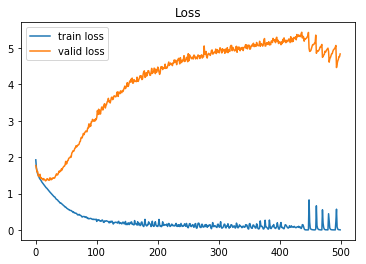

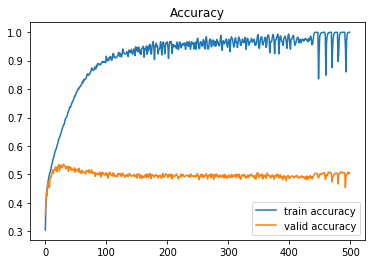

In [8]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()